# Exercise 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline

In [2]:
#1] Convert datestamp column to a datetime object and Set the datestamp columns as the index of 
#your DataFrame. Check if there are missing values in each column.

In [3]:
#reading the csv file and setting datestamp as index of the data frame
df=pd.read_csv("employment.csv",parse_dates=True,index_col='datestamp')
df.head()

,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
datestamp,,,,,,,,,,,,,,,,
2000-01-01,10.3,5.7,9.7,3.2,2.3,2.7,2.1,3.4,7.5,3.6,3.9,4.4,4.9,2.3,4.3,5.0
2000-02-01,11.5,5.2,10.6,2.9,2.2,2.8,2.0,2.9,7.5,3.4,5.5,4.2,4.1,2.5,4.0,5.2
2000-03-01,10.4,5.4,8.7,2.8,2.5,2.6,1.5,3.6,7.4,3.6,3.7,5.1,4.3,2.0,3.5,5.1
2000-04-01,8.9,4.5,5.8,3.4,2.1,2.3,1.3,2.4,6.1,3.7,4.1,4.0,4.2,2.0,3.4,4.1
2000-05-01,5.1,4.7,5.0,3.4,2.7,2.2,1.9,3.5,6.2,3.4,5.3,3.6,4.5,1.9,3.4,4.3


In [4]:
#checking is there are any misssing values
df.isnull().any()

Agriculture                       False
Business services                 False
Construction                      False
Durable goods manufacturing       False
Education and Health              False
Finance                           False
Government                        False
Information                       False
Leisure and hospitality           False
Manufacturing                     False
Mining and Extraction             False
Nondurable goods manufacturing    False
Other                             False
Self-employed                     False
Transportation and Utilities      False
Wholesale and Retail Trade        False
dtype: bool

In [5]:
# As we can see there is no missing value

In [6]:
#2] Generate a boxplot to find the distribution of unemployment rate for every industry .


<AxesSubplot:>

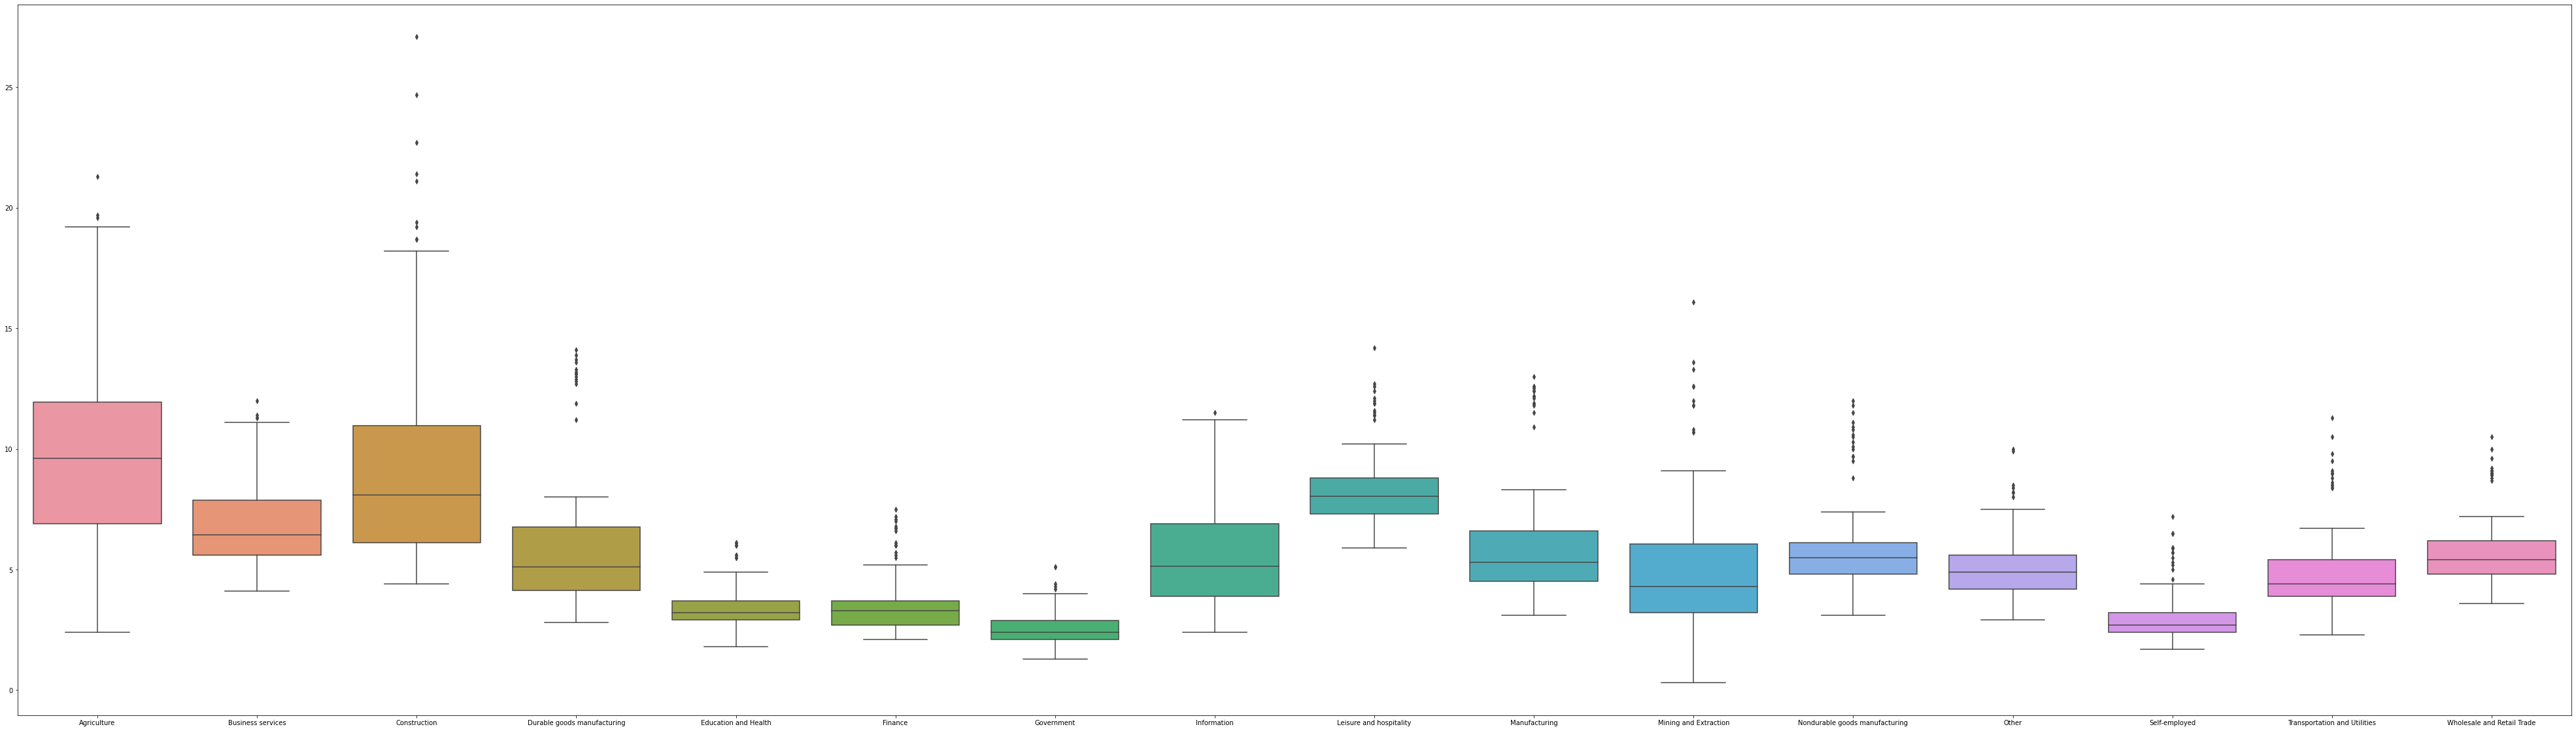

In [7]:
fig, axes=plt.subplots(figsize=(70,20))
sns.boxplot(data=df,ax=axes)

In [8]:
#3] Using line chart Visualize the unemployment rate of workers by industry .

array([<AxesSubplot:xlabel='datestamp'>, <AxesSubplot:xlabel='datestamp'>,
       <AxesSubplot:xlabel='datestamp'>, <AxesSubplot:xlabel='datestamp'>,
       <AxesSubplot:xlabel='datestamp'>, <AxesSubplot:xlabel='datestamp'>,
       <AxesSubplot:xlabel='datestamp'>, <AxesSubplot:xlabel='datestamp'>,
       <AxesSubplot:xlabel='datestamp'>, <AxesSubplot:xlabel='datestamp'>,
       <AxesSubplot:xlabel='datestamp'>, <AxesSubplot:xlabel='datestamp'>,
       <AxesSubplot:xlabel='datestamp'>, <AxesSubplot:xlabel='datestamp'>,
       <AxesSubplot:xlabel='datestamp'>, <AxesSubplot:xlabel='datestamp'>],
      dtype=object)

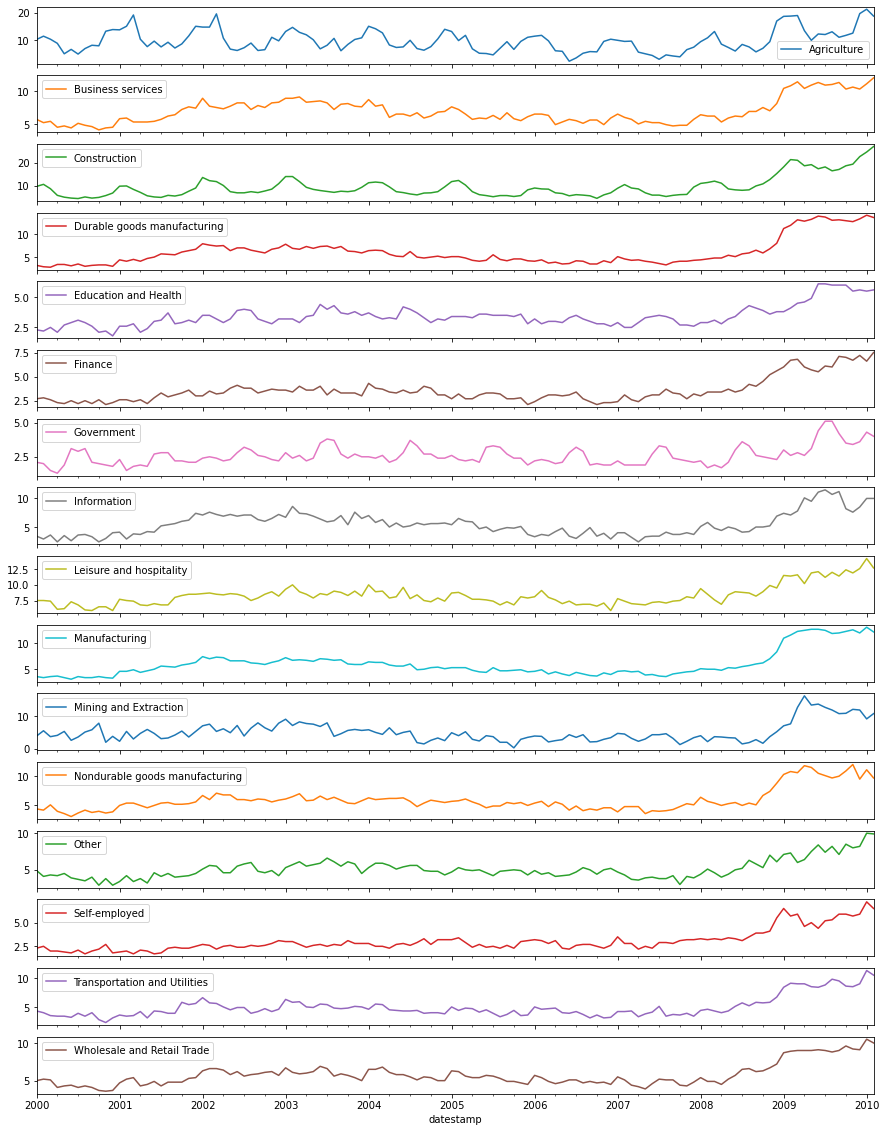

In [9]:
df.plot(subplots=True,figsize=(15,20))

In [10]:
#4] Plot the monthly and yearly trends .

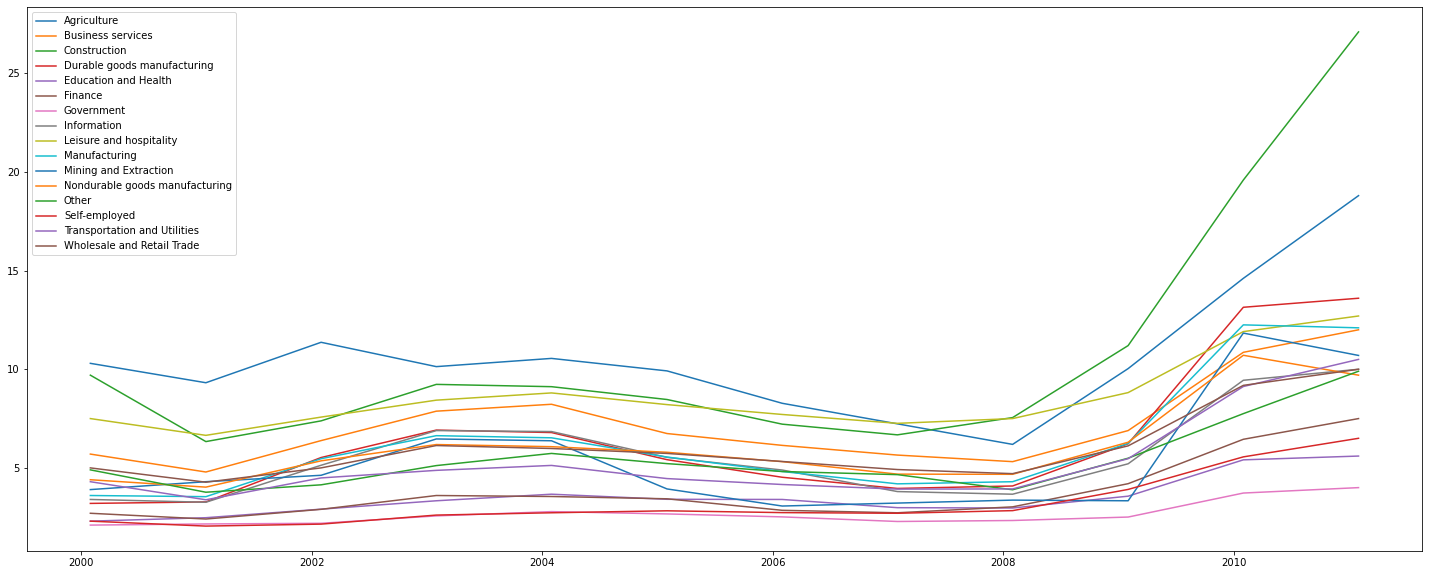

In [11]:
df_year=df.resample("12M").mean()
fig,ax=plt.subplots(figsize=(25,10))
ax.plot(df_year)
ax.legend(df_year.columns)

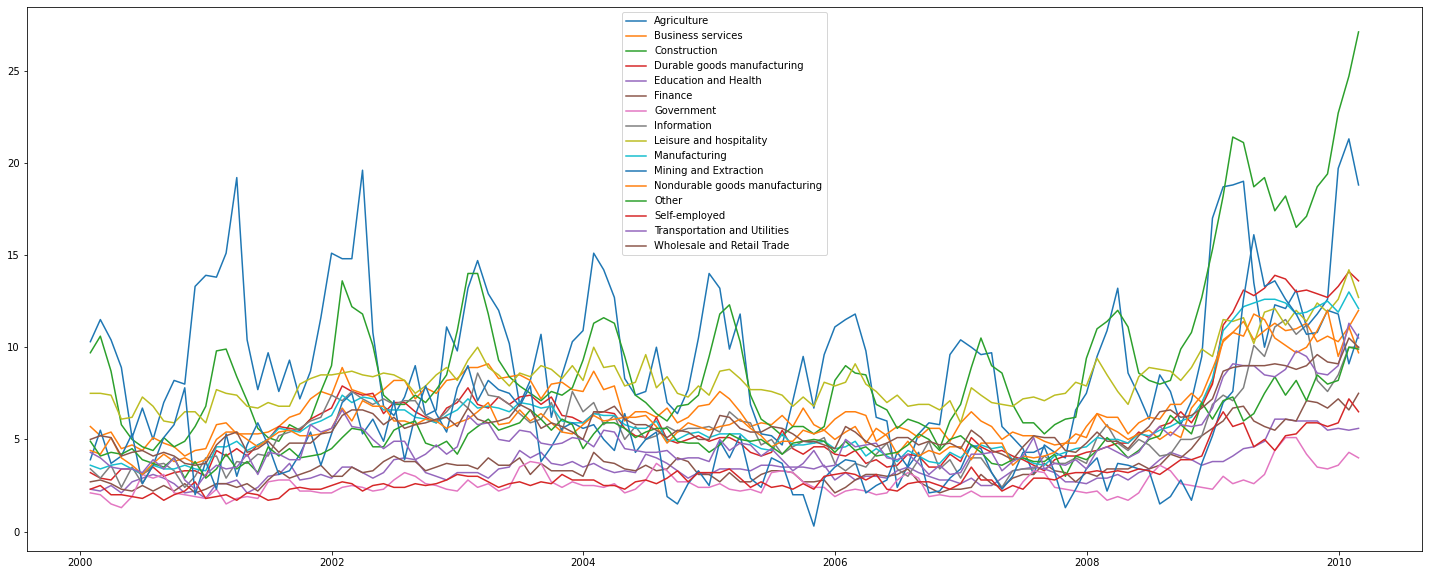

In [12]:
df_month=df.resample("M").mean()
fig,ax=plt.subplots(figsize=(25,10))
ax.plot(df_month)
ax.legend(df_month.columns)

In [13]:
#5] Apply time series decomposition to your dataset to visualize the trend and seasonality.

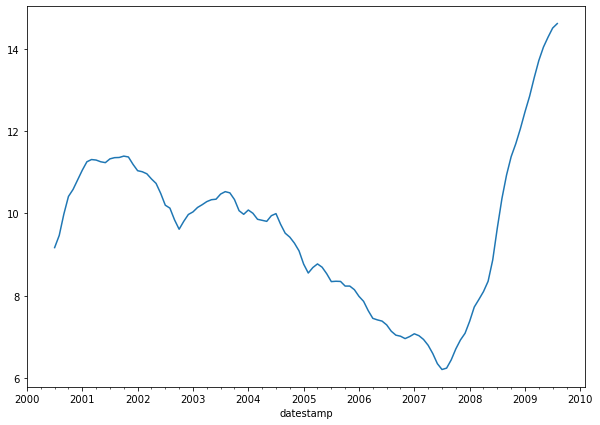

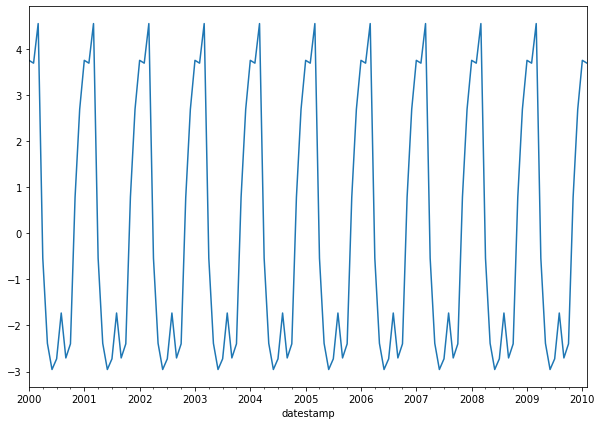

In [14]:
from pylab import rcParams
from  statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
rcParams['figure.figsize'] = 10, 7
decomposition = sm.tsa.seasonal_decompose(df_month['Agriculture'], model='Additive')
fig = decomposition.trend.plot()
plt.show()
fig=decomposition.seasonal.plot()
plt.show()

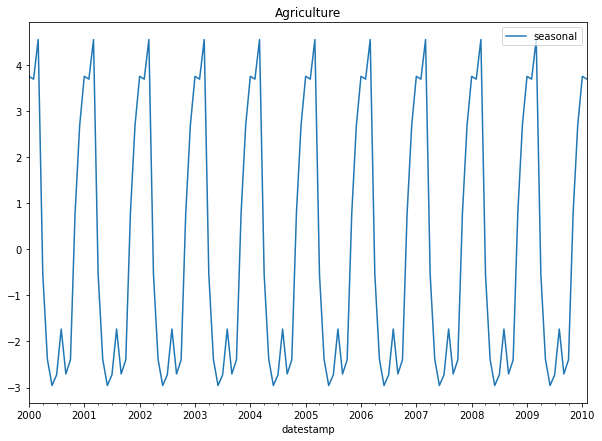

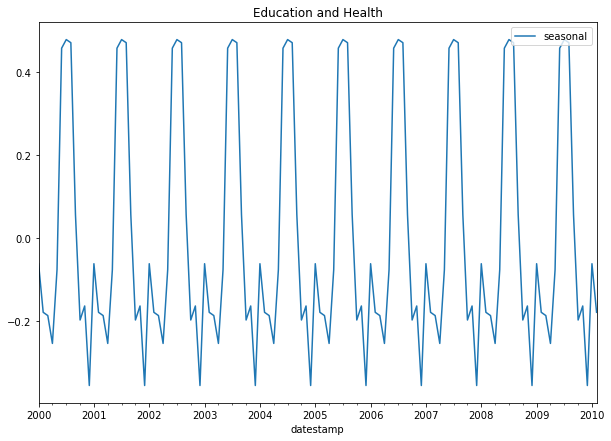

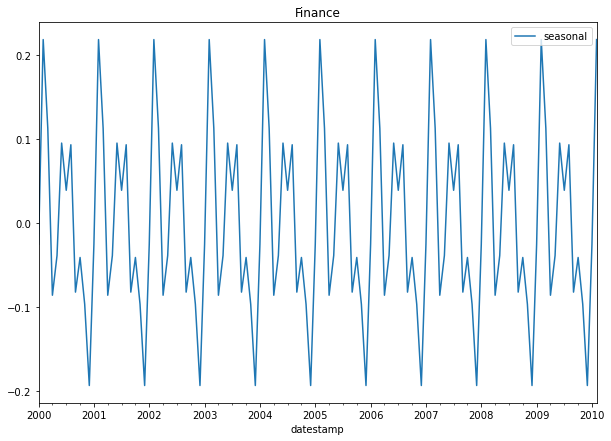

In [15]:
sep_cln = ["Agriculture", "Education and Health", "Finance"]
i = 0
for (columnName, columnData) in df[sep_cln].iteritems():
    f = plt.figure()
    a = f.add_subplot(111)
    a.set_title(df[sep_cln].columns[i])
    res = sm.tsa.seasonal_decompose(df[columnName], model='additive')
    res.seasonal.plot()
    plt.legend(loc="upper right")
    i += 1

In [16]:
#7] Visualize the seasonality of multiple time series and the correlation between each time series in the dataset.

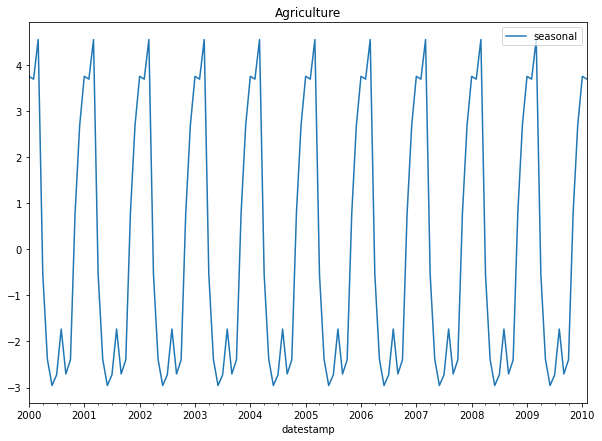

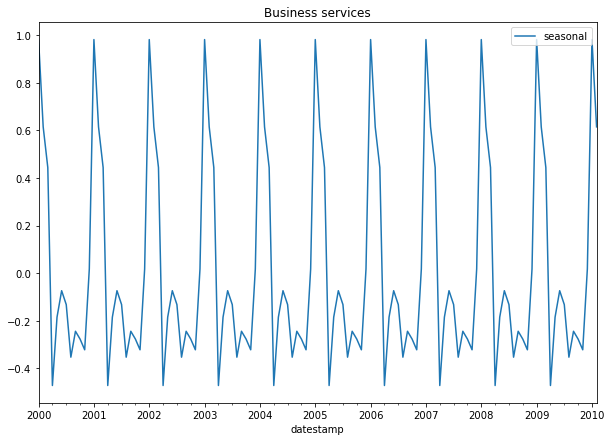

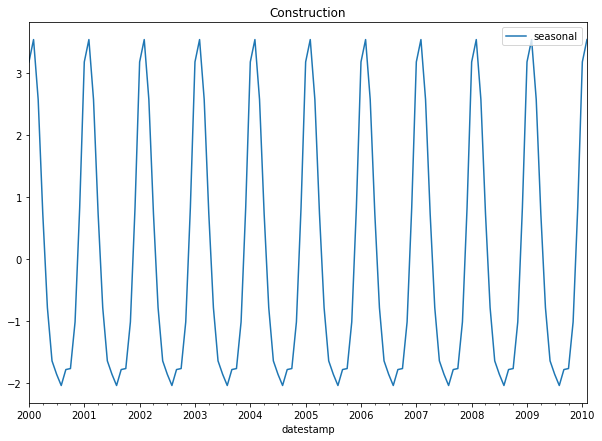

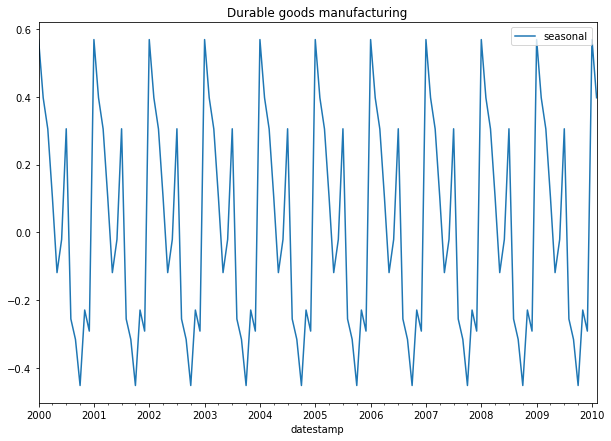

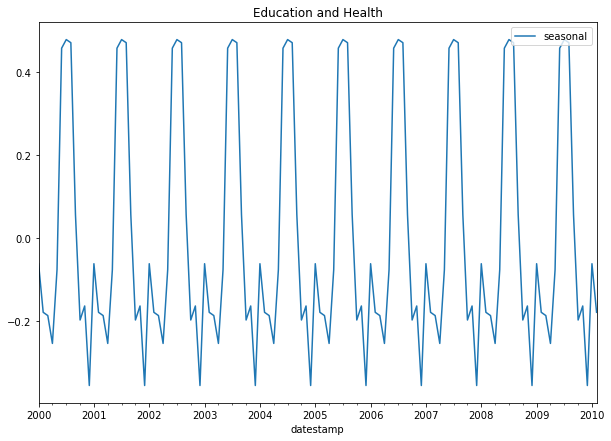

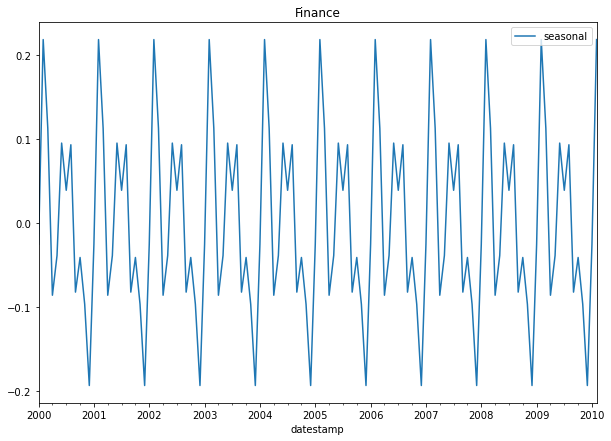

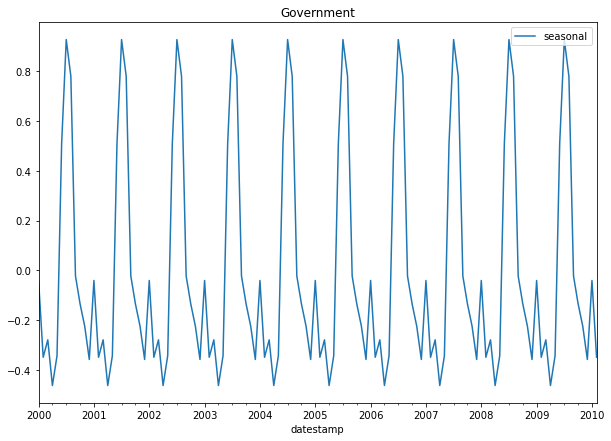

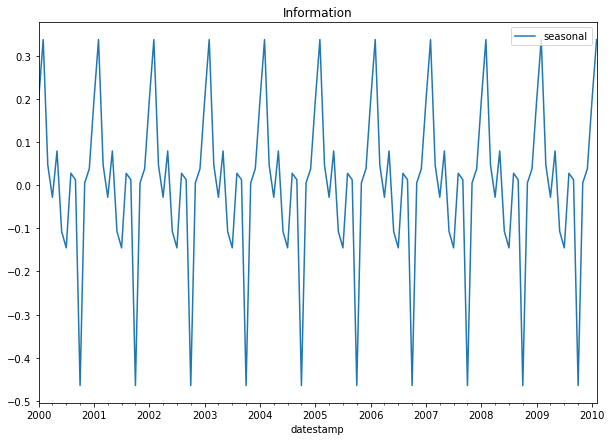

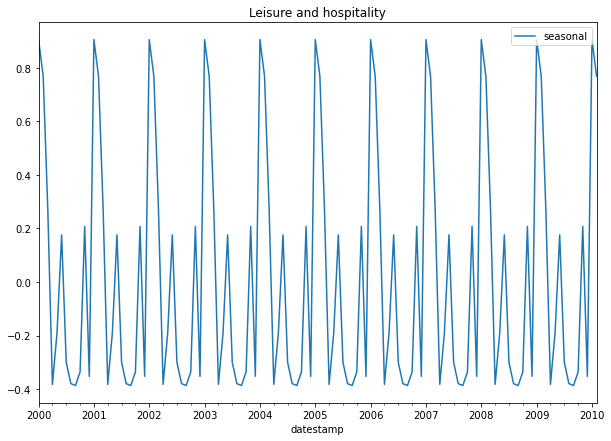

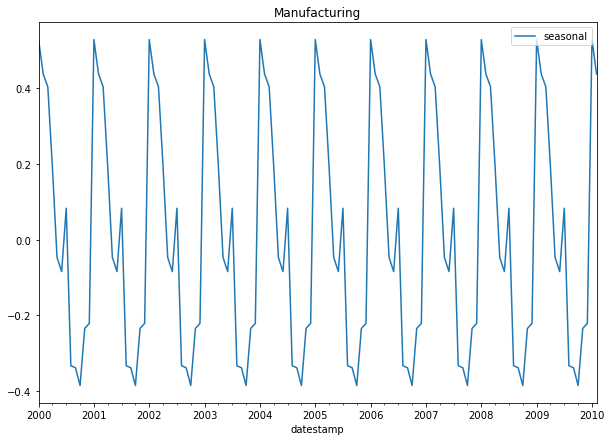

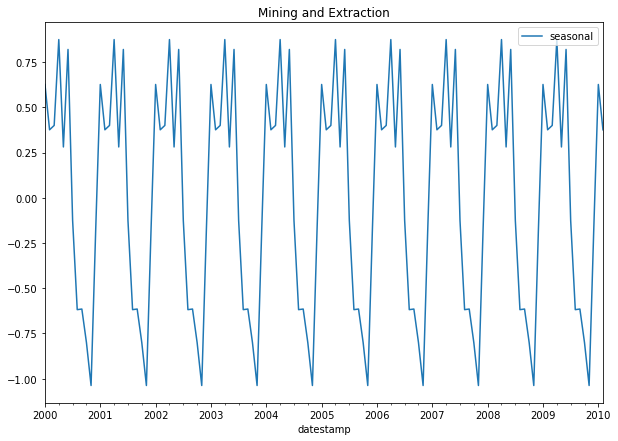

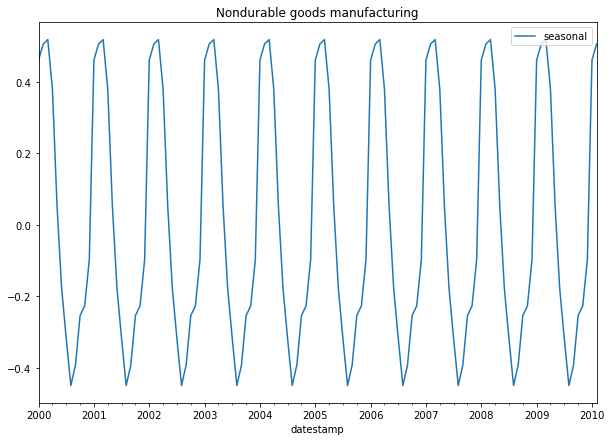

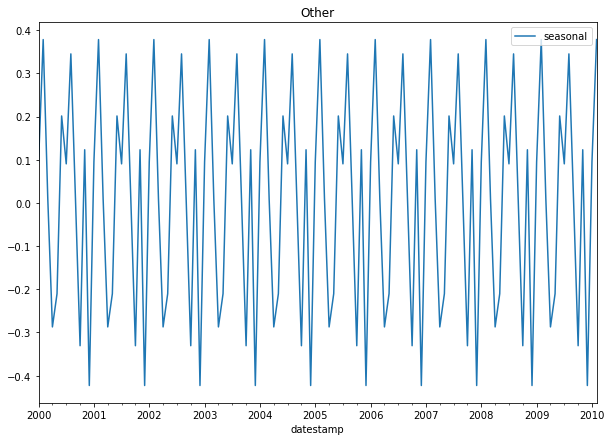

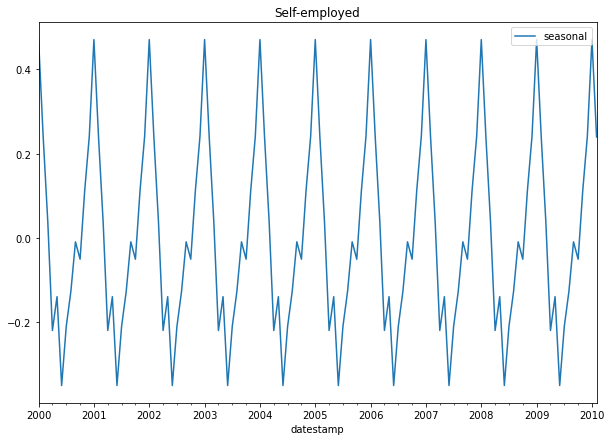

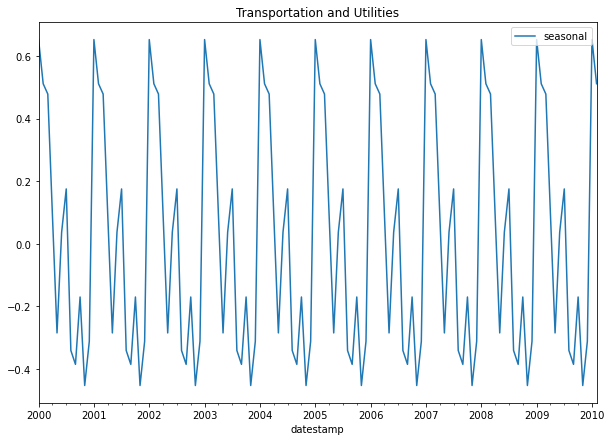

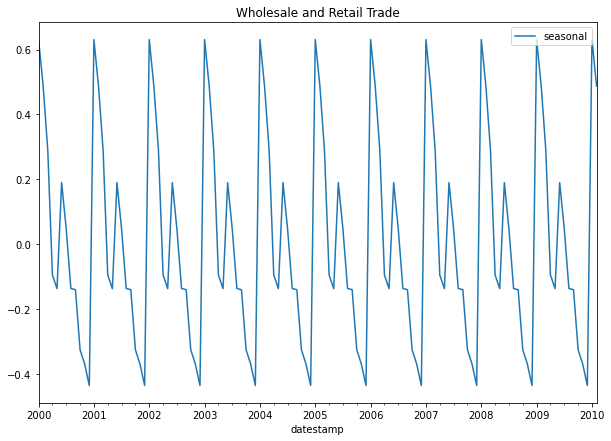

In [17]:
results = []
i = 0
for (columnName, columnData) in df.iteritems():
    f = plt.figure()
    a = f.add_subplot(111)
    res = seasonal_decompose(df[columnName], model='additive')
    a.set_title(df.columns[i])
    res.seasonal.plot()
    plt.legend(loc="upper right")
    results.append(res.seasonal)
    i += 1

# Exercise-2

In [18]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#3] Use Python library mlxtend and convert the transactions into a format that can be used in the Apriori method for finding frequent itemsets.  

In [19]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import csv

In [ ]:
#2] Prepare the data for finding association rules. Each transaction will contain a list of item in each transaction.

In [21]:
with open('groceries.csv', 'r') as groceries:
    csv_reader = csv.reader(groceries)
    list_of_rows = list(csv_reader)
    
(list_of_rows)

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['pot plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter milk

In [24]:
te = TransactionEncoder()
te_ary = te.fit(list_of_rows).transform(list_of_rows)

In [25]:
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [26]:
#1] How many transactions and items are there in the data set?

In [27]:
df.shape

(9835, 169)

In [28]:
#4]  Find Top Selling Items with Minimum Support of 2%

In [29]:
apriori(df, min_support=0.02)

,support,itemsets
0,0.033452,(1)
1,0.052466,(9)
2,0.033249,(10)
3,0.026029,(11)
4,0.080529,(12)
...,...,...
117,0.032232,"(162, 166)"
118,0.020742,"(162, 167)"
119,0.056024,"(166, 167)"
120,0.023183,"(124, 166, 103)"


In [30]:
apriori(df, min_support=0.02, use_colnames=True)

,support,itemsets
0,0.033452,(UHT-milk)
1,0.052466,(beef)
2,0.033249,(berries)
3,0.026029,(beverages)
4,0.080529,(bottled beer)
...,...,...
117,0.032232,"(whole milk, whipped/sour cream)"
118,0.020742,"(yogurt, whipped/sour cream)"
119,0.056024,"(yogurt, whole milk)"
120,0.023183,"(root vegetables, whole milk, other vegetables)"


In [31]:
#5] Find all frequent itemsets with minimum support of 5%

In [32]:
var_frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)
var_frequent_itemsets['length'] = var_frequent_itemsets['itemsets'].apply(lambda x: len(x))
var_frequent_itemsets

,support,itemsets,length
0,0.052466,(beef),1
1,0.080529,(bottled beer),1
2,0.110524,(bottled water),1
3,0.064870,(brown bread),1
4,0.055414,(butter),1
5,0.077682,(canned beer),1
6,0.082766,(citrus fruit),1
7,0.058058,(coffee),1
8,0.053279,(curd),1
9,0.063447,(domestic eggs),1


In [33]:
#6] Find all the Frequent itemsets of length 2 with minimum support of 2%

In [34]:
var_frequent_itemsets[ (var_frequent_itemsets['length'] == 2) &
                   (var_frequent_itemsets['support'] >= 0.02) ]

,support,itemsets,length
28,0.074835,"(whole milk, other vegetables)",2
29,0.056634,"(rolls/buns, whole milk)",2
30,0.056024,"(yogurt, whole milk)",2


In [ ]:
#7] Find the top 10 association rules with minimum support of 2%, sorted by confidence in descending order.

In [66]:
confi_ass=association_rules(var_frequent_itemsets, metric="confidence",min_threshold=0.02)
confi_ass.sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
1,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
2,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696
0,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
3,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452
5,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157


In [ ]:
#8] Find association rules with minimum support of 2% and lift of more than 1.0.

In [70]:
rules = association_rules(var_frequent_itemsets, metric="lift", min_threshold=1.0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
1,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
2,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696
3,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452
4,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
5,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157
